### Questions from the class
* identify (conditional) operators? - Jonathan - hold off for now
* implementing statistics lab - Jonathan

### Objectives
YWBAT 
* write functions to calculate statistics and apply those functions to a dataframe
* write functions to plot distributions
* interpret data based on the statistics
* use pandas to create new columns
* remove outliers from data by using pandas slicing 


In [2]:
import numpy as np
import pandas as pd

from collections import defaultdict
from random import shuffle
from sklearn.datasets import load_wine
from pprint import pprint #prettyprint

import matplotlib.pyplot as plt

In [3]:
attendees = ["joel", "bryan", "ahmed", "gina", "alex", "nick", "jonathan"]
shuffle(attendees)
attendees

['joel', 'jonathan', 'ahmed', 'bryan', 'alex', 'nick', 'gina']

### always do this step first when loading in a pre built dataset

In [4]:
wine = load_wine() # calling the load function

In [5]:
data = wine.data # x_vec-values
target = wine.target # y-values of our data set

columns = wine.feature_names + ["target"] # feature_names = names of columns 
columns

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

In [6]:
full_data = np.column_stack((data, target)) # numpy method that vertically concatenates two arrays
full_data.shape

(178, 14)

In [7]:
df = pd.DataFrame(full_data, columns=columns)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## Write a function

In [8]:
### write a function that takes in a load method 
### from sklearn datasets and returns a dataframe
### like the one above
def load_dataset(load_set=None):
    data_set = load_set() # data_set is a dictionary from load_set()
    data = data_set.data # x_vec-values
    target = data_set.target # y-values of our data set
    columns = data_set.feature_names + ["target"] # feature_names = names of columns 
    full_data = np.column_stack([data, target]) # list of numpy arrays
    df = pd.DataFrame(full_data, columns=columns) # create dataframes
    return df

In [9]:
df = load_dataset(load_set=load_wine)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### Let's look at a description

In [10]:
pprint(wine.DESCR)

('.. _wine_dataset:\n'
 '\n'
 'Wine recognition dataset\n'
 '------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 178 (50 in each of three classes)\n'
 '    :Number of Attributes: 13 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 ' \t\t- Alcohol\n'
 ' \t\t- Malic acid\n'
 ' \t\t- Ash\n'
 '\t\t- Alcalinity of ash  \n'
 ' \t\t- Magnesium\n'
 '\t\t- Total phenols\n'
 ' \t\t- Flavanoids\n'
 ' \t\t- Nonflavanoid phenols\n'
 ' \t\t- Proanthocyanins\n'
 '\t\t- Color intensity\n'
 ' \t\t- Hue\n'
 ' \t\t- OD280/OD315 of diluted wines\n'
 ' \t\t- Proline\n'
 '\n'
 '    - class:\n'
 '            - class_0\n'
 '            - class_1\n'
 '            - class_2\n'
 '\t\t\n'
 '    :Summary Statistics:\n'
 '    \n'
 '    ============================= ==== ===== ======= =====\n'
 '                                   Min   Max   Mean     SD\n'
 '    ============================= ==== ===== ======= =====\n'
 '    Alcohol:

In [12]:
### calculate the mean of malic acid without using .mean() or np.mean()
summ = np.sum(df["malic_acid"])
counts = df["malic_acid"].shape[0]
mean_malic_acid = 1.0*summ/counts
mean_malic_acid, np.mean(df["malic_acid"])

(2.3363483146067416, 2.336348314606741)

In [16]:
### calculate the standard deviation of malic acid without using .std() or np.std()
mean = np.sum(df["malic_acid"])/len(df["malic_acid"])
counts = len(df["malic_acid"])
distances_squared = (df["malic_acid"] - mean)**2
sum_dist_squared = np.sum(distances_squared)
mean_dist_squred = sum_dist_squared/counts


std_malic_acid = np.sqrt(mean_dist_squred)
std_malic_acid, np.std(df["malic_acid"])

(1.1140036269797893, 1.1140036269797895)

In [19]:
### write functions that takes in a list (array) and returns the mean and standard deviation
def mean_function(arr):
    summ = np.sum(arr)
    counts = arr.shape[0]
    mean = 1.0*summ/counts
    return mean

def std_function(arr):
    mean = mean_function(arr)
    counts = len(arr)
    distances_squared = (arr - mean)**2
    sum_dist_squared = np.sum(distances_squared)
    mean_dist_squred = sum_dist_squared/counts
    std_malic_acid = np.sqrt(mean_dist_squred)
    return std_malic_acid

In [20]:
mean_function(df["malic_acid"]), std_function(df["malic_acid"])

(2.3363483146067416, 1.1140036269797893)

(array([ 8., 10., 15., 44., 23., 10.,  8.,  8.,  5.,  9.,  5.,  6., 10.,
         4.,  4.,  3.,  2.,  1.,  1.,  2.]),
 array([0.74 , 0.993, 1.246, 1.499, 1.752, 2.005, 2.258, 2.511, 2.764,
        3.017, 3.27 , 3.523, 3.776, 4.029, 4.282, 4.535, 4.788, 5.041,
        5.294, 5.547, 5.8  ]),
 <a list of 20 Patch objects>)

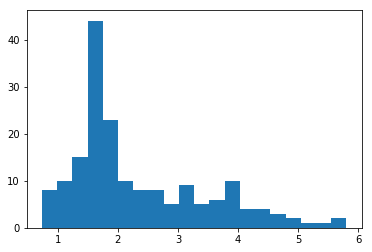

In [22]:
plt.hist(df["malic_acid"], bins=20)

### Plot Distribution

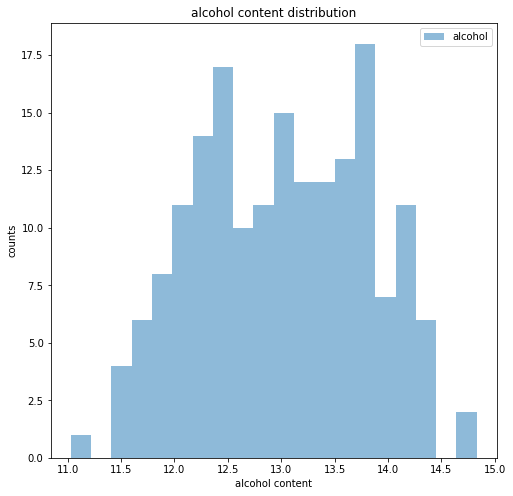

In [26]:
### plot the distribution of alcohol content
### code goes here
plt.figure(figsize=(8, 8))
plt.hist(df["alcohol"], label="alcohol", alpha=0.5, bins=20)
plt.xlabel("alcohol content")
plt.ylabel("counts")
plt.title("alcohol content distribution")
plt.legend()
plt.show()

In [39]:
### write a function that takes in a dataframe and column name and returns a histogram
### the histogram must have labeled axes and a title

def histogram(ddddf, cname, figsize=(8, 8), alpha=0.5, bins=20, color='blue'):
    plt.figure(figsize=figsize)
    plt.hist(ddddf[cname], color=color, label=cname, alpha=alpha, bins=bins)
    plt.xlabel(cname)
    plt.ylabel("counts")
    plt.title("{} distribution".format(cname))
    plt.legend()
    plt.show()
    pass

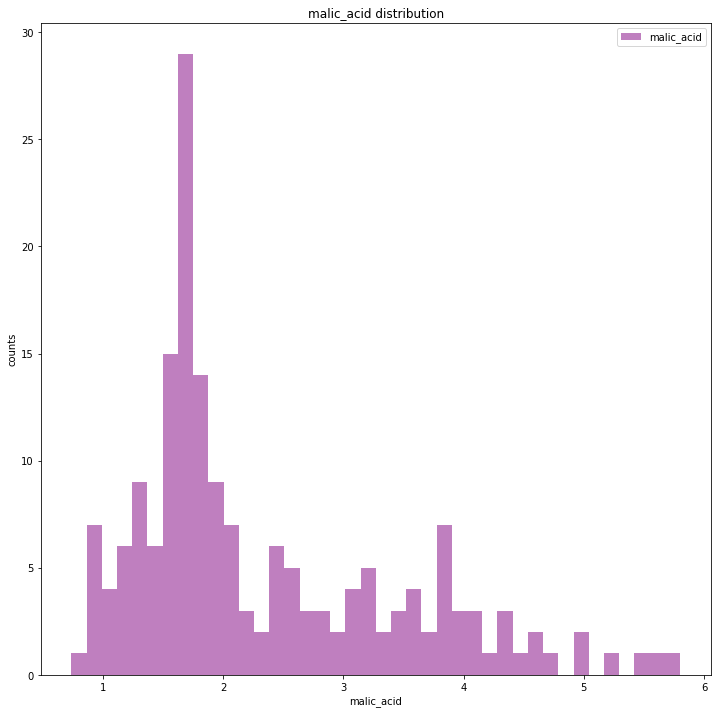

In [42]:
histogram(ddddf=df, color='purple', figsize=(12, 12), alpha=0.5, bins=40 , cname="malic_acid")

### Creating columns with pandas

In [47]:
### create a new column that is the ratio of ash to malic acid and name it
### ash_to_malic_acid

# code goes here
df["ash_to_malic_acid"] = df["ash"]/df["malic_acid"]
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,ash_to_malic_acid
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,1.421053
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,1.202247
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,1.131356
